### Import Libraries

In [34]:
import numpy as np
import torch.nn as nn
import torch
import matplotlib.pyplot as plt

### Load the dataset

In [35]:
# load the dataset
fmri_dataset = torch.load('data/fMRI_data/demo1/digits-fmri')
# load the labels
labels = torch.load('data/images/demo1/raw_imgs/digits-labels') - 1
# print the shape
print(fmri_dataset.shape)
print(labels.shape)


(100, 3092)
(100, 1)


In [36]:
total_blocks = fmri_dataset.shape[0]
fmri_size = fmri_dataset.shape[1]
print('total blocks : '+str(total_blocks))
print('input fmri size : '+str(fmri_size))

total blocks : 100
input fmri size : 3092


In [37]:
print(labels)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [38]:
n_epochs = 100
batch_size = 10
test_size = 10

In [39]:
# define the model


class SemanticDecoder(nn.Module):
  """
  Initialize MLP Network
  """

  def __init__(self, actv, input_feature_num, hidden_unit_nums, output_feature_num):
    """
    Initialize MLP Network parameters

    Args:
      actv: string
        Activation function
      input_feature_num: int
        Number of input features
      hidden_unit_nums: list
        Number of units in the hidden layer
      output_feature_num: int
        Number of output features

    Returns:
      Nothing
    """
    super(SemanticDecoder, self).__init__()
    self.input_feature_num = input_feature_num # Save the input size for reshaping later
    self.model = nn.Sequential() # Initialize layers of MLP

    in_num = input_feature_num # Initialize the temporary input feature to each layer
    for i in range(len(hidden_unit_nums)): # Loop over layers and create each one

      out_num = hidden_unit_nums[i] # Assign the current layer hidden unit from list
      layer = nn.Linear(in_num, out_num) # Use nn.Linear to define the layer

      in_num = out_num # Assign next layer input using current layer output
      self.model.add_module('Linear_%d'%i, layer) # Append layer to the model with a name

      actv_layer = eval('nn.%s'%actv) # Assign activation function (eval allows us to instantiate object from string)
      self.model.add_module('Activation_%d'%i, actv_layer) # Append activation to the model with a name

    out_layer = nn.Linear(in_num, output_feature_num) # Create final layer
    self.model.add_module('Output_Linear', out_layer) # Append the final layer

    actv_layer = nn.Sigmoid()
    self.model.add_module('LastActivation', actv_layer)

  def forward(self, x):
    """
    Simulate forward pass of MLP Network

    Args:
      x: torch.tensor
        Input data

    Returns:
      logits: Instance of MLP
        Forward pass of MLP
    """
    # Reshape inputs to (batch_size, input_feature_num)
    # Just in case the input vector is not 2D, like an image!
    x = x.view(x.shape[0], -1)
    logits = self.model(x) # Forward pass of MLP
    return logits


In [40]:
hidden_layers_shape = [1024, 64]
activation = 'Tanh()'
semanticDecoder = SemanticDecoder(actv=activation, input_feature_num=fmri_size, hidden_unit_nums=hidden_layers_shape, output_feature_num=2)
# y = net()
# print(f'The output shape is {y.shape} for an input of shape {fmri_size.shape}')

In [41]:
cuda = True if torch.cuda.is_available() else False
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor
fmri = torch.from_numpy(fmri_dataset)
fmri = fmri.type(Tensor)
print(type(fmri_dataset))
semanticDecoder.forward(fmri)

<class 'numpy.ndarray'>


tensor([[0.5241, 0.5044],
        [0.5236, 0.5065],
        [0.5238, 0.5062],
        [0.5231, 0.5055],
        [0.5225, 0.5076],
        [0.5228, 0.5047],
        [0.5218, 0.5075],
        [0.5218, 0.5084],
        [0.5243, 0.5077],
        [0.5211, 0.5081],
        [0.5233, 0.5072],
        [0.5209, 0.5066],
        [0.5215, 0.5075],
        [0.5212, 0.5073],
        [0.5233, 0.5058],
        [0.5216, 0.5093],
        [0.5221, 0.5062],
        [0.5231, 0.5082],
        [0.5237, 0.5054],
        [0.5207, 0.5076],
        [0.5220, 0.5076],
        [0.5226, 0.5064],
        [0.5218, 0.5071],
        [0.5227, 0.5063],
        [0.5212, 0.5081],
        [0.5233, 0.5078],
        [0.5210, 0.5072],
        [0.5216, 0.5075],
        [0.5220, 0.5078],
        [0.5215, 0.5081],
        [0.5221, 0.5069],
        [0.5217, 0.5081],
        [0.5225, 0.5058],
        [0.5221, 0.5064],
        [0.5210, 0.5081],
        [0.5221, 0.5081],
        [0.5226, 0.5079],
        [0.5218, 0.5078],
        [0.5

In [42]:
# define the loss function
loss_function = torch.nn.CrossEntropyLoss()

# define optimizer
# tuning the hyperparameters
lr = 0.0002
b1 = 0.5
b2 = 0.999

gamma_1 = 0.8
step_1 = 10
last_epoch_1 = -1
optimizer = torch.optim.Adam(semanticDecoder.parameters(), lr=lr, betas=(b1, b2))
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_1, gamma=gamma_1, last_epoch=last_epoch_1)

In [43]:
train_fmri = np.concatenate([fmri[0:45], fmri[50:95]])
test_fmri = np.concatenate([fmri[45:50], fmri[95:100]])

rand_id = np.random.randint(low=0, high=train_fmri.shape[0], size=train_fmri.shape[0])
train_fmri = train_fmri[rand_id]
fmri = np.concatenate([train_fmri, test_fmri])
print(fmri.shape)

train_labels = np.concatenate([labels[0:45], labels[50:95]])
test_labels = np.concatenate([labels[45:50], labels[95:100]])
train_labels = train_labels[rand_id]
labels = np.concatenate([train_labels, test_labels])

fmri = torch.from_numpy(fmri)
fmri = fmri.type(Tensor)

train_fmri = torch.from_numpy(train_fmri)
train_labels = torch.from_numpy(train_labels)
train_labels = train_labels.squeeze()
train_fmri = train_fmri.type(Tensor)
train_labels = train_labels.type(Tensor)

test_fmri = torch.from_numpy(test_fmri)
test_labels = torch.from_numpy(test_labels)
test_labels = test_labels.squeeze()
test_fmri = test_fmri.type(Tensor)
test_labels = test_labels.type(Tensor)

(100, 3092)


In [44]:
n_epochs = 100

In [45]:
acc_vec = []
train_vec = []
loss_vec = []
for epoch in range(n_epochs):
    for i in range(0, 9):
            fmri_data = train_fmri[i*batch_size:(i+1) * batch_size]
            labels_data = train_labels[i*batch_size:(i+1) * batch_size]
            labels_data = labels_data.long()
            optimizer.zero_grad()
            predict = semanticDecoder(fmri_data)
            loss = loss_function(predict, labels_data)
            loss.backward()
            optimizer.step()
            loss_vec.append(loss.item())
            print(
                "[Epoch %d/%d] [Batch %d] [loss: %f] "
                % (epoch, n_epochs, i, loss.item())
            )

    if epoch % 1 == 0:
            test_fmri_data = test_fmri
            test_label_data = test_labels.cpu().detach().numpy()
            lbs = semanticDecoder(test_fmri_data)
            cpu_labels = lbs.cpu().detach().numpy()
            pred = [np.argmax(lb) for lb in cpu_labels]
            num_correct = (pred == test_label_data).sum()
            acc = num_correct / 10
            acc_vec.append(acc)


    scheduler.step()
    lrd = optimizer.param_groups[0]['lr']

print(acc_vec)

[Epoch 0/100] [Batch 0] [loss: 0.694888] 
[Epoch 0/100] [Batch 1] [loss: 0.691317] 
[Epoch 0/100] [Batch 2] [loss: 0.688377] 
[Epoch 0/100] [Batch 3] [loss: 0.695828] 
[Epoch 0/100] [Batch 4] [loss: 0.697494] 
[Epoch 0/100] [Batch 5] [loss: 0.682810] 
[Epoch 0/100] [Batch 6] [loss: 0.686512] 
[Epoch 0/100] [Batch 7] [loss: 0.690262] 
[Epoch 0/100] [Batch 8] [loss: 0.678635] 
[Epoch 1/100] [Batch 0] [loss: 0.672777] 
[Epoch 1/100] [Batch 1] [loss: 0.670550] 
[Epoch 1/100] [Batch 2] [loss: 0.664640] 
[Epoch 1/100] [Batch 3] [loss: 0.690136] 
[Epoch 1/100] [Batch 4] [loss: 0.697352] 
[Epoch 1/100] [Batch 5] [loss: 0.646685] 
[Epoch 1/100] [Batch 6] [loss: 0.666480] 
[Epoch 1/100] [Batch 7] [loss: 0.678998] 
[Epoch 1/100] [Batch 8] [loss: 0.644244] 
[Epoch 2/100] [Batch 0] [loss: 0.638278] 
[Epoch 2/100] [Batch 1] [loss: 0.635577] 
[Epoch 2/100] [Batch 2] [loss: 0.623418] 
[Epoch 2/100] [Batch 3] [loss: 0.668093] 
[Epoch 2/100] [Batch 4] [loss: 0.674630] 
[Epoch 2/100] [Batch 5] [loss: 0.6

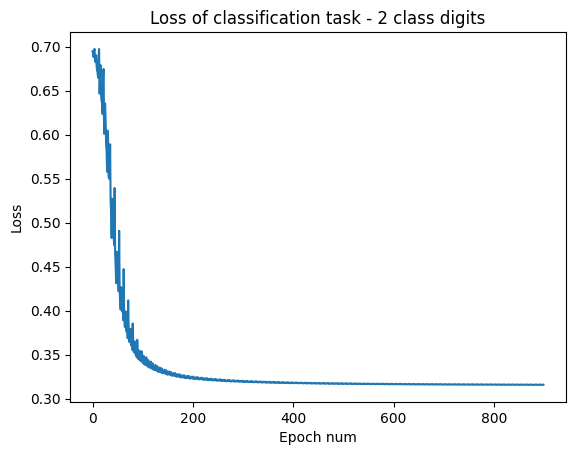

In [46]:
plt.figure()
plt.title('Loss of classification task - 2 class digits')
plt.plot(loss_vec)
plt.xlabel('Epoch num')
plt.ylabel('Loss')
plt.show()